In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##Memuat Dataset


In [2]:
# Import library
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Import model Linear Regression dari scikit-learn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [3]:
# Baca dataset (pastikan file sudah di-upload ke Colab)
df = pd.read_csv('/content/drive/MyDrive/PENULISAN ILMIAH/BAHAN BAKAR MOBIL 2023.csv', encoding='latin1')

# Tampilkan 5 baris pertama data
df.head()


,Year,Make,Model,Vehicle Class,Engine Size (L),Cylinders,Transmission,Fuel Type,Fuel Consumption (L/100Km),Hwy (L/100 km),Comb (L/100 km),Comb (mpg),CO2 Emissions (g/km),CO2 Rating,Smog Rating
0,2023,Acura,Integra,Full-size,1.5,4.0,AV7,Z,7.9,6.3,7.2,39.0,167.0,6.0,7.0
1,2023,Acura,Integra A-SPEC,Full-size,1.5,4.0,AV7,Z,8.1,6.5,7.4,38.0,172.0,6.0,7.0
2,2023,Acura,Integra A-SPEC,Full-size,1.5,4.0,M6,Z,8.9,6.5,7.8,36.0,181.0,6.0,6.0
3,2023,Acura,MDX SH-AWD,SUV: Small,3.5,6.0,AS10,Z,12.6,9.4,11.2,25.0,263.0,4.0,5.0
4,2023,Acura,MDX SH-AWD Type S,SUV: Standard,3.0,6.0,AS10,Z,13.8,11.2,12.4,23.0,291.0,4.0,5.0


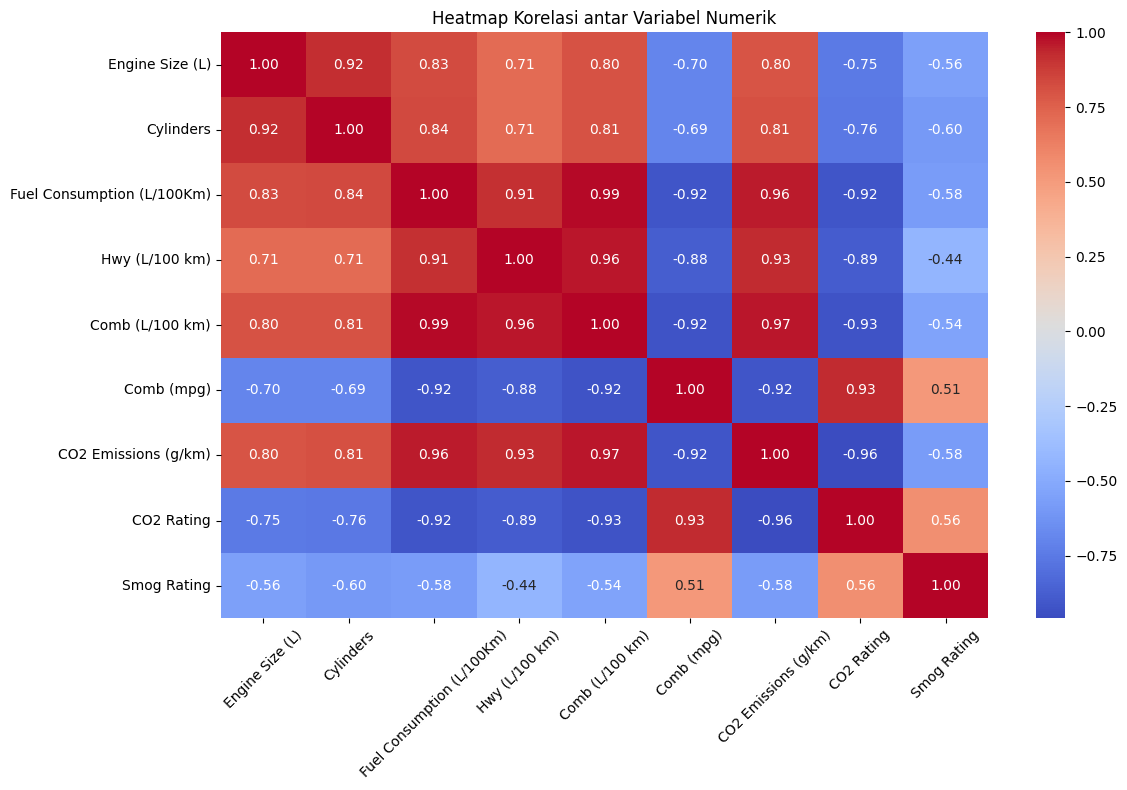

In [4]:
# Membuat matriks korelasi hanya untuk data numerik
correlation_matrix = df.corr(numeric_only=True)

# Membuat heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Heatmap Korelasi antar Variabel Numerik")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [5]:
# Lihat nama-nama kolom dalam dataset
df.columns

Index(['Year', 'Make', 'Model', 'Vehicle Class', 'Engine Size (L)',
       'Cylinders', 'Transmission', 'Fuel Type', 'Fuel Consumption (L/100Km)',
       'Hwy (L/100 km)', 'Comb (L/100 km)', 'Comb (mpg)',
       'CO2 Emissions (g/km)', 'CO2 Rating', 'Smog Rating'],
      dtype='object')

In [6]:
df['Fuel Type'].unique()

array(['Z', 'X', 'D', 'E', nan], dtype=object)

##Visualisasi Scatter Plot

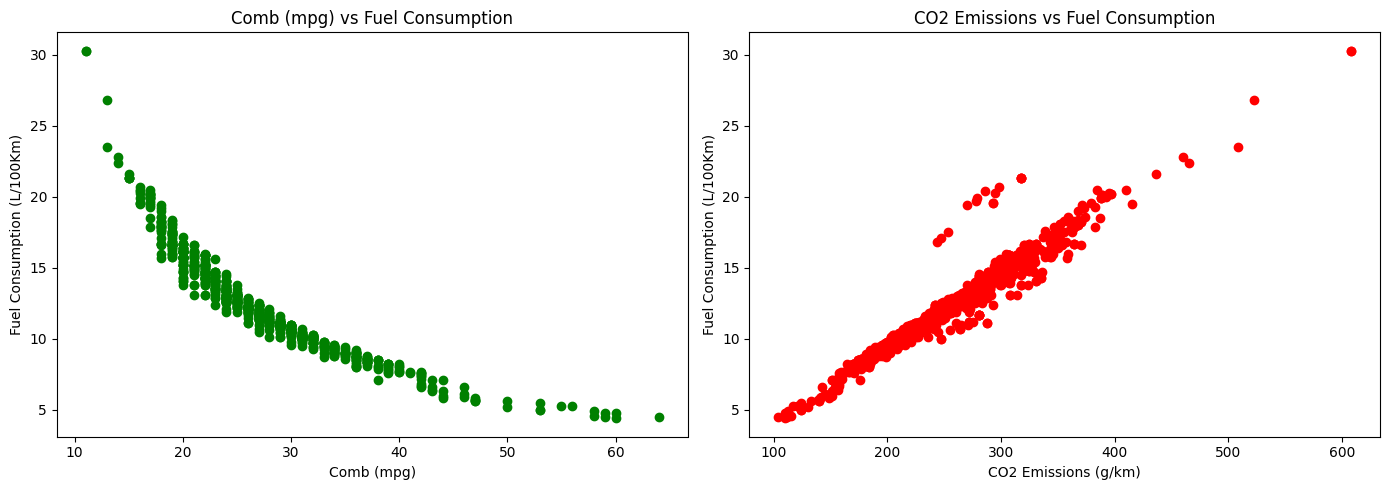

In [7]:

# Membuat figure dengan 2 subplot berdampingan (1 baris, 2 kolom)
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

# Subplot pertama: Comb (mpg) vs Fuel Consumption (L/100Km)
axs[0].scatter(df['Comb (mpg)'], df['Fuel Consumption (L/100Km)'], color='green')  # Plot titik-titik scatter
axs[0].set_xlabel('Comb (mpg)')  # Label sumbu X
axs[0].set_ylabel('Fuel Consumption (L/100Km)')  # Label sumbu Y
axs[0].set_title('Comb (mpg) vs Fuel Consumption')  # Judul grafik

# Subplot kedua: CO2 Emissions (g/km) vs Fuel Consumption (L/100Km)
axs[1].scatter(df['CO2 Emissions (g/km)'], df['Fuel Consumption (L/100Km)'], color='red')  # Plot titik-titik scatter
axs[1].set_xlabel('CO2 Emissions (g/km)')  # Label sumbu X
axs[1].set_ylabel('Fuel Consumption (L/100Km)')  # Label sumbu Y
axs[1].set_title('CO2 Emissions vs Fuel Consumption')  # Judul grafik

# Memberikan ruang antar subplot agar tidak saling tumpang tindih
plt.tight_layout()

# Menampilkan semua grafik
plt.show()


In [8]:
# Mengisi nilai kosong (NaN) dengan rata-rata di setiap kolom
df_clean = df.fillna(df.mean(numeric_only=True))

# Menampilkan 5 baris pertama dari data setelah dibersihkan
df_clean.head()


,Year,Make,Model,Vehicle Class,Engine Size (L),Cylinders,Transmission,Fuel Type,Fuel Consumption (L/100Km),Hwy (L/100 km),Comb (L/100 km),Comb (mpg),CO2 Emissions (g/km),CO2 Rating,Smog Rating
0,2023,Acura,Integra,Full-size,1.5,4.0,AV7,Z,7.9,6.3,7.2,39.0,167.0,6.0,7.0
1,2023,Acura,Integra A-SPEC,Full-size,1.5,4.0,AV7,Z,8.1,6.5,7.4,38.0,172.0,6.0,7.0
2,2023,Acura,Integra A-SPEC,Full-size,1.5,4.0,M6,Z,8.9,6.5,7.8,36.0,181.0,6.0,6.0
3,2023,Acura,MDX SH-AWD,SUV: Small,3.5,6.0,AS10,Z,12.6,9.4,11.2,25.0,263.0,4.0,5.0
4,2023,Acura,MDX SH-AWD Type S,SUV: Standard,3.0,6.0,AS10,Z,13.8,11.2,12.4,23.0,291.0,4.0,5.0


##Mempersiapkan dan Melatih Model


In [9]:
# Buat dictionary mapping
fuel_mapping = {
    'Z': 'Gasoline',
    'X': 'Hybrid',
    'D': 'Diesel',
    'E': 'Electric'
}

# Terapkan mapping ke kolom 'Fuel Type'
df['Fuel Type'] = df['Fuel Type'].map(fuel_mapping)

df['Fuel Type'] = df['Fuel Type'].fillna('Unknown')

In [10]:
# Mengambil dua kolom sebagai variabel X (fitur)
X = df_clean[['Comb (mpg)', 'CO2 Emissions (g/km)']]

# Mengambil satu kolom sebagai variabel Y (target)
Y = df_clean[['Fuel Consumption (L/100Km)']]


In [11]:
# Menentukan fitur (X) dan target (Y)
X = df_clean[['Comb (mpg)', 'CO2 Emissions (g/km)']]  # Menggunakan 2 fitur
Y = df_clean[['Fuel Consumption (L/100Km)']]          # Target tetap sama

# Mengisi nilai NaN dengan nilai rata-rata
X = X.fillna(X.mean())
Y = Y.fillna(Y.mean())

# Split data menjadi data latih dan data uji
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

print("Jumlah data latih:", len(X_train))
print("Jumlah data uji:", len(X_test))

# Membuat dan melatih model regresi linear
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

# Melakukan prediksi pada data uji
y_pred = model.predict(X_test)


Jumlah data latih: 599
Jumlah data uji: 257


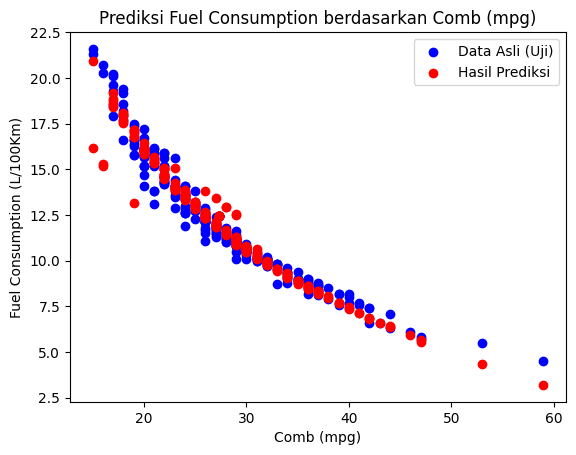

In [12]:
# Visualisasi hasil prediksi vs data asli berdasarkan fitur Comb (mpg)
plt.scatter(X_test['Comb (mpg)'], y_test, color='blue', label='Data Asli (Uji)')      # Titik asli
plt.scatter(X_test['Comb (mpg)'], y_pred, color='red', label='Hasil Prediksi')       # Titik prediksi

# Memberikan label dan judul
plt.xlabel('Comb (mpg)')
plt.ylabel('Fuel Consumption (L/100Km)')
plt.title('Prediksi Fuel Consumption berdasarkan Comb (mpg)')
plt.legend()
plt.show()


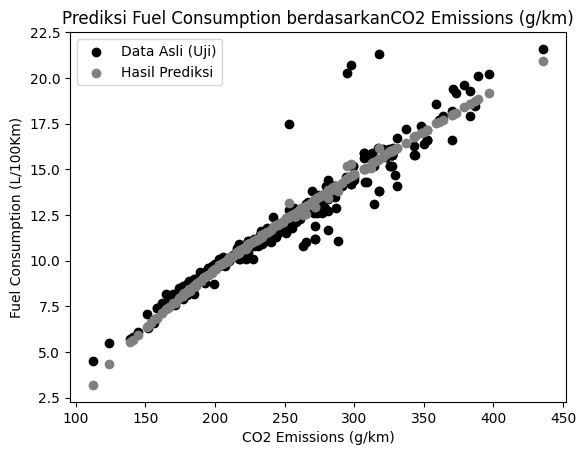

In [13]:
# Visualisasi hasil prediksi vs data asli berdasarkan fitur Comb (mpg)
plt.scatter(X_test['CO2 Emissions (g/km)'], y_test, color='black', label='Data Asli (Uji)')      # Titik asli
plt.scatter(X_test['CO2 Emissions (g/km)'], y_pred, color='grey', label='Hasil Prediksi')       # Titik prediksi

# Memberikan label dan judul
plt.xlabel('CO2 Emissions (g/km)')
plt.ylabel('Fuel Consumption (L/100Km)')
plt.title('Prediksi Fuel Consumption berdasarkanCO2 Emissions (g/km)')
plt.legend()
plt.show()


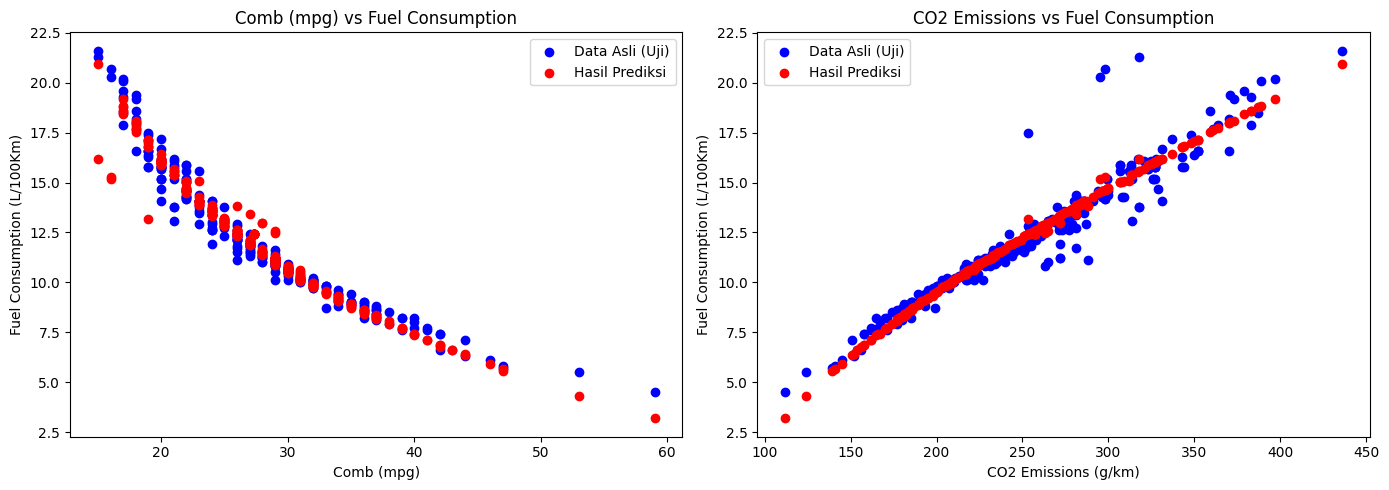

In [14]:
# Membuat figure dengan 2 subplot (1 baris, 2 kolom)
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

# Subplot pertama: Comb (mpg) vs Fuel Consumption (asli & prediksi)
axs[0].scatter(X_test['Comb (mpg)'], y_test, color='blue', label='Data Asli (Uji)')
axs[0].scatter(X_test['Comb (mpg)'], y_pred, color='red', label='Hasil Prediksi')
axs[0].set_xlabel('Comb (mpg)')
axs[0].set_ylabel('Fuel Consumption (L/100Km)')
axs[0].set_title('Comb (mpg) vs Fuel Consumption')
axs[0].legend()

# Subplot kedua: CO2 Emissions vs Fuel Consumption (asli & prediksi)
axs[1].scatter(X_test['CO2 Emissions (g/km)'], y_test, color='blue', label='Data Asli (Uji)')
axs[1].scatter(X_test['CO2 Emissions (g/km)'], y_pred, color='red', label='Hasil Prediksi')
axs[1].set_xlabel('CO2 Emissions (g/km)')
axs[1].set_ylabel('Fuel Consumption (L/100Km)')
axs[1].set_title('CO2 Emissions vs Fuel Consumption')
axs[1].legend()

# Atur tata letak agar tidak tumpang tindih
plt.tight_layout()

# Tampilkan plot
plt.show()


##Menampilkan Hasil Regresi

Koefisien (Coefficient):
Menunjukkan seberapa besar perubahan pada Fuel Consumption (L/100Km) jika salah satu fitur meningkat 1 satuan, sementara fitur lainnya dianggap tetap.

Intersep (Intercept):
Nilai Fuel Consumption (L/100Km) saat semua fitur (X) bernilai 0.
Walaupun kondisi ini tidak realistis di dunia nyata (karena Comb (mpg) dan CO2 Emissions tidak mungkin 0), nilai ini tetap dihitung secara matematis sebagai titik potong garis regresi.


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


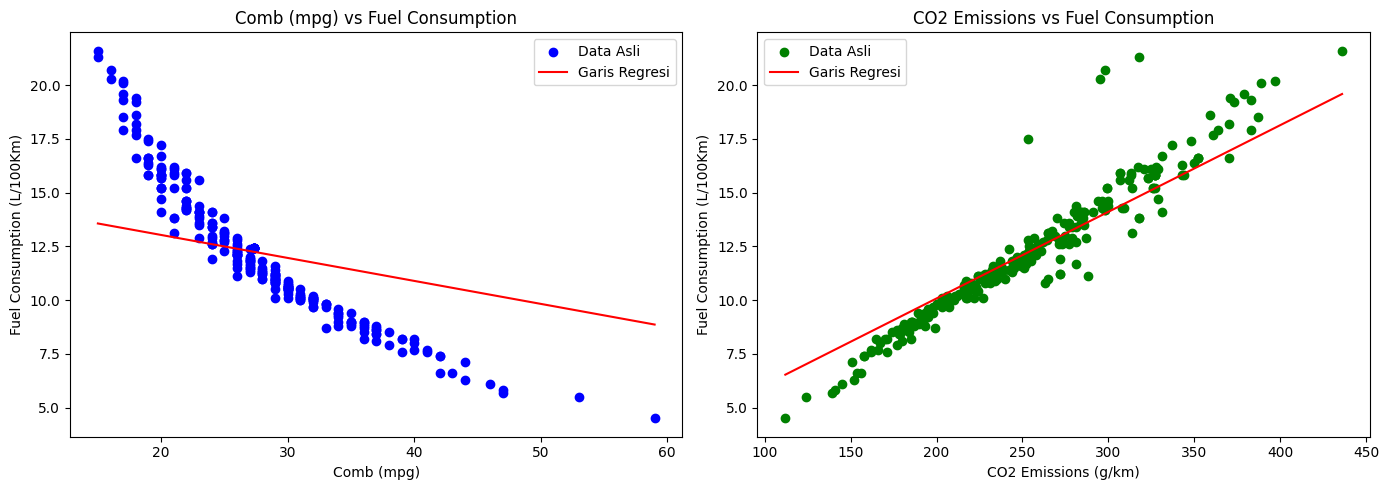

In [15]:

# Membuat figure dengan 2 subplot (1 baris, 2 kolom)
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

# --- Subplot 1: Comb (mpg) vs Fuel Consumption ---
axs[0].scatter(X_test['Comb (mpg)'], y_test, color='blue', label='Data Asli')

# Membuat garis regresi: CO2 Emissions dijaga tetap (rata-rata dari data uji)
comb_range = np.linspace(X_test['Comb (mpg)'].min(), X_test['Comb (mpg)'].max(), 100)
co2_mean = X_test['CO2 Emissions (g/km)'].mean()
X_pred_comb = np.column_stack((comb_range, np.full_like(comb_range, co2_mean)))
y_pred_comb = model.predict(X_pred_comb)

axs[0].plot(comb_range, y_pred_comb, color='red', label='Garis Regresi')
axs[0].set_xlabel('Comb (mpg)')
axs[0].set_ylabel('Fuel Consumption (L/100Km)')
axs[0].set_title('Comb (mpg) vs Fuel Consumption')
axs[0].legend()

# --- Subplot 2: CO2 Emissions vs Fuel Consumption ---
axs[1].scatter(X_test['CO2 Emissions (g/km)'], y_test, color='green', label='Data Asli')

# Membuat garis regresi: Comb dijaga tetap (rata-rata dari data uji)
co2_range = np.linspace(X_test['CO2 Emissions (g/km)'].min(), X_test['CO2 Emissions (g/km)'].max(), 100)
comb_mean = X_test['Comb (mpg)'].mean()
X_pred_co2 = np.column_stack((np.full_like(co2_range, comb_mean), co2_range))
y_pred_co2 = model.predict(X_pred_co2)

axs[1].plot(co2_range, y_pred_co2, color='red', label='Garis Regresi')
axs[1].set_xlabel('CO2 Emissions (g/km)')
axs[1].set_ylabel('Fuel Consumption (L/100Km)')
axs[1].set_title('CO2 Emissions vs Fuel Consumption')
axs[1].legend()

# Tata letak antar subplot
plt.tight_layout()

# Tampilkan grafik
plt.show()


Subplot 1: Menunjukkan pengaruh Comb (mpg) terhadap Fuel Consumption dengan asumsi CO2 Emissions tetap.

Subplot 2: Menunjukkan pengaruh CO2 Emissions terhadap Fuel Consumption dengan asumsi Comb (mpg) tetap.

In [16]:
# Menampilkan koefisien dan intercept dari model regresi

# Koefisien untuk masing-masing fitur (Comb (mpg) dan CO2 Emissions (g/km))
print("Koefisien:")
for fitur, nilai_koef in zip(X.columns, model.coef_[0]):
    print(f"  {fitur}: {nilai_koef}")

# Intercept (nilai prediksi saat semua fitur bernilai 0)
print("Intercept:", model.intercept_[0])


Koefisien:
  Comb (mpg): -0.10685185603118269
  CO2 Emissions (g/km): 0.04029425822761053
Intercept: 4.986803570323243


##Evaluasi Model

In [17]:
# Menentukan fitur X dan target Y
X = df[['Comb (mpg)', 'CO2 Emissions (g/km)']]  # Dua fitur
Y = df[['Fuel Consumption (L/100Km)']]          # Target

# Mengisi NaN dengan rata-rata
X = X.fillna(X.mean(numeric_only=True))
Y = Y.fillna(Y.mean(numeric_only=True))

# Split data 70% latih dan 30% uji
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Membuat dan melatih model regresi
model = LinearRegression()
model.fit(X_train, y_train)

# Prediksi data uji
y_pred = model.predict(X_test)

# Evaluasi model
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

# Tampilkan hasil evaluasi
print("Skor R² (koefisien determinasi):", r2)
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)


Skor R² (koefisien determinasi): 0.9253388654305683
Mean Absolute Error (MAE): 0.4885193773042269
Mean Squared Error (MSE): 0.7516810019721238


#insight


In [18]:
# Load dataset
df = pd.read_csv('/content/drive/MyDrive/PENULISAN ILMIAH/BAHAN BAKAR MOBIL 2023.csv', encoding='latin1')

# Mapping jenis bahan bakar
fuel_mapping = {
    'Z': 'Gasoline',
    'X': 'Hybrid',
    'D': 'Diesel',
    'E': 'Electric'
}
df['Fuel Type Name'] = df['Fuel Type'].map(fuel_mapping)
df['Fuel Type Name'] = df['Fuel Type Name'].fillna('Unknown')

# Definisi merek Asia dan Eropa
asia_makes = ['Acura', 'Genesis', 'Honda', 'Hyundai', 'Infiniti', 'Kia', 'Lexus',
              'Mazda', 'Mitsubishi', 'Nissan', 'Subaru', 'Toyota']
eropa_makes = ['Alfa Romeo', 'Aston Martin', 'Audi', 'Bentley', 'BMW', 'Bugatti',
               'FIAT', 'Jaguar', 'Land Rover', 'Maserati', 'Mercedes-Benz',
               'MINI', 'Porsche', 'Rolls-Royce', 'Volkswagen', 'Volvo']

# Tambahkan kolom Region berdasarkan Make
df['Region'] = df['Make'].apply(
    lambda x: 'Asia' if x in asia_makes else ('Eropa' if x in eropa_makes else 'Other'))

# Filter fuel type yang valid saja
df = df[df['Fuel Type Name'].isin(['Gasoline', 'Hybrid', 'Diesel', 'Electric'])]

# Ambil 10 mobil paling hemat per kombinasi Region dan Fuel Type
top_10 = df.groupby(['Region', 'Fuel Type Name'], group_keys=False).apply(
    lambda x: x.sort_values(by='Comb (L/100 km)').head(10)
)

# Pisahkan hasil Asia dan Eropa
top_10_asia = top_10[top_10['Region'] == 'Asia']
top_10_eropa = top_10[top_10['Region'] == 'Eropa']

# Tampilkan hasil
print("===== Top 10 Mobil Terhemat - Asia =====")
print(top_10_asia[['Make', 'Model', 'Fuel Type Name', 'Comb (L/100 km)']])

print("\n===== Top 10 Mobil Terhemat - Eropa =====")
print(top_10_eropa[['Make', 'Model', 'Fuel Type Name', 'Comb (L/100 km)']])


===== Top 10 Mobil Terhemat - Asia =====
        Make                        Model Fuel Type Name  Comb (L/100 km)
548    Lexus                  NX 350h AWD       Gasoline              6.0
553    Lexus                  RX 350h AWD       Gasoline              6.5
0      Acura                      Integra       Gasoline              7.2
1      Acura               Integra A-SPEC       Gasoline              7.4
396    Honda               Civic Sedan Si       Gasoline              7.7
2      Acura               Integra A-SPEC       Gasoline              7.8
600    Mazda                         MX-5       Gasoline              7.9
541    Lexus                      LC 500h       Gasoline              8.1
601    Mazda                   MX-5 (SIL)       Gasoline              8.1
554    Lexus                  RX 500h AWD       Gasoline              8.6
488      Kia                      Niro FE         Hybrid              4.4
414  Hyundai               Elantra Hybrid         Hybrid              4

/tmp/ipython-input-18-4257728728.py:31: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_10 = df.groupby(['Region', 'Fuel Type Name'], group_keys=False).apply(


In [23]:
# Ambil 1 mobil paling hemat dari Asia
most_efficient_asia = top_10_asia.sort_values(by='Comb (L/100 km)').head(1)

# Ambil 1 mobil paling hemat dari Eropa
most_efficient_eropa = top_10_eropa.sort_values(by='Comb (L/100 km)').head(1)

# Gabungkan hasil
comparison = pd.concat([most_efficient_asia, most_efficient_eropa])

# Tampilkan hasil perbandingan
print("===== Perbandingan Mobil Paling Hemat Asia vs Eropa =====")
print(comparison[['Region', 'Make', 'Model', 'Fuel Type Name', 'Comb (L/100 km)']])

# Cari mobil paling hemat di antara keduanya
most_efficient_overall = comparison.sort_values(by='Comb (L/100 km)').head(1).iloc[0]

print("\n===== Mobil Paling Hemat di Antara Keduanya =====")
print(f"{most_efficient_overall['Make']} {most_efficient_overall['Model']} dari {most_efficient_overall['Region']} "
      f"dengan konsumsi bahan bakar {most_efficient_overall['Comb (L/100 km)']} L/100 km.")

# Ambil data untuk kesimpulan
asia_car = most_efficient_asia.iloc[0]
eropa_car = most_efficient_eropa.iloc[0]

# Cetak kesimpulan
print("\n===== Kesimpulan =====")
print(f"Mobil paling hemat dari Asia adalah {asia_car['Make']} {asia_car['Model']} dengan konsumsi {asia_car['Comb (L/100 km)']} L/100 km.")
print(f"Mobil paling hemat dari Eropa adalah {eropa_car['Make']} {eropa_car['Model']} dengan konsumsi {eropa_car['Comb (L/100 km)']} L/100 km.")
if asia_car['Comb (L/100 km)'] < eropa_car['Comb (L/100 km)']:
    print(f"Kesimpulannya, mobil dari Asia ({asia_car['Make']} {asia_car['Model']}) lebih hemat dibandingkan mobil dari Eropa ({eropa_car['Make']} {eropa_car['Model']}).")
elif asia_car['Comb (L/100 km)'] > eropa_car['Comb (L/100 km)']:
    print(f"Kesimpulannya, mobil dari Eropa ({eropa_car['Make']} {eropa_car['Model']}) lebih hemat dibandingkan mobil dari Asia ({asia_car['Make']} {asia_car['Model']}).")
else:
    print("Kedua mobil memiliki konsumsi bahan bakar yang sama.")


===== Perbandingan Mobil Paling Hemat Asia vs Eropa =====
    Region        Make    Model Fuel Type Name  Comb (L/100 km)
488   Asia         Kia  Niro FE         Hybrid              4.4
812  Eropa  Volkswagen    Jetta         Hybrid              6.8

===== Mobil Paling Hemat di Antara Keduanya =====
Kia Niro FE dari Asia dengan konsumsi bahan bakar 4.4 L/100 km.

===== Kesimpulan =====
Mobil paling hemat dari Asia adalah Kia Niro FE dengan konsumsi 4.4 L/100 km.
Mobil paling hemat dari Eropa adalah Volkswagen Jetta dengan konsumsi 6.8 L/100 km.
Kesimpulannya, mobil dari Asia (Kia Niro FE) lebih hemat dibandingkan mobil dari Eropa (Volkswagen Jetta).
